# **Introduction**
Project ini merupakan tugas terakhir dari virtual experience program dari id/x partners dan rakamin academy. Pada kali ini, Saya sebagai data scientist diminta untuk membuat model yang dapat memprediksi credit risk menggunakan dataset yang terdiri dari data pinjaman yang diterima dan yang ditolak.


# **Business Understanding**
*   Perusahaan pinjaman (Lending Company) memiliki masalah pada produk pinjaman yang ditandai dengan meningkatnya credit risk dibandingkan tahun-tahun sebelumnya
*   Perusahaan juga perlu memperhitungkan secara kuantitatif risk of loss due to default or prepayment

# **Analytical Approach**
* Diperlukan adanya sebuah loan credit risk modelling sebagai salah satu penilaian untuk credit approval.
* Cara kerja loan credit risk modelling ini adalah dengan membuat model machine learning menggunakan data-data historis peminjam dan status pinjaman saat ini untuk memprediksi resiko dari loan credit seseorang di masa depan.
* Loan Credit risk modelling ini bisa menjadi salah satu alat bagi perusahaan untuk mengambil keputusan apakah akan menerima kredit pinjaman atau menolak. Perusahaan dapat menggunakan model atau sistem scoring selain model ini sebagai acuan untuk menilai credit risk Perusahaan.


# **Exploratory Data Analysis**

In [ ]:
#import library yang digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns; sns.set();

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#import data yang akan digunakan
df = pd.read_csv('https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [ ]:
# menampilkan definisi tiap variabel
info_data = pd.read_excel("LCDataDictionary.xlsx", sheet_name="LoanStats")

In [ ]:
info_data

,LoanStatNew,Description,translate
0,addr_state,The state provided by the borrower in the loan...,Negara yang disediakan oleh peminjam dalam apl...
1,annual_inc,The self-reported annual income provided by th...,Penghasilan tahunan yang dilaporkan sendiri ya...
2,annual_inc_joint,The combined self-reported annual income provi...,Penghasilan tahunan yang dilaporkan sendiri ga...
3,application_type,Indicates whether the loan is an individual ap...,Menunjukkan apakah pinjaman adalah aplikasi in...
4,collection_recovery_fee,post charge off collection fee,Biaya pengumpulan biaya penagihan
...,...,...,...
75,acc_now_delinq,The number of accounts on which the borrower i...,Jumlah akun di mana peminjam sekarang nakal.
76,tot_coll_amt,Total collection amounts ever owed,Total jumlah pengumpulan yang pernah ada
77,tot_cur_bal,Total current balance of all accounts,Total Saldo Saat Ini dari Semua Akun
78,NaN,NaN,NaN


In [ ]:
#menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
# melihat jumlah data yang terduplikat
df.duplicated().sum()

0

In [ ]:
title_font = dict(size=20, weight="bold")

def plot_count(df, y, title, **sns_kwargs):
    value_counts = df[y].value_counts()
    percentage = value_counts / value_counts.sum()
    percentage = percentage.apply("{:.2%}".format)

    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.countplot(data=df, y=y, order=value_counts.index, **sns_kwargs)
    plt.ylabel("")
    plt.show()

    print(percentage)


def plot_distribution(df, x, title, **sns_kwargs):
    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.histplot(data=df, x=x, kde=True, **sns_kwargs)
    plt.ylabel("")
    plt.show()


def plot_boxplot(df, x, y, title, **sns_kwargs):
    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.boxplot(data=df, x=x, y=y, **sns_kwargs)
    plt.ylabel("")
    plt.show()

## 1. Menentukan dan Mendefinisikan Target
### Status Pinjaman
Jika kita lihat dari tampilan grafik, sebagian dari pinjaman masih berstatus current dan fully paid, dengan total persentase sekitar 87,71%.

Status pinjaman menampilkan kondisi sekarang seluruh peminjam di suatu perusahaan. Tentu status yang diharapkan perusahaan addalah fully paid, yang berarti seluruh pinjaman telah dilunasi.

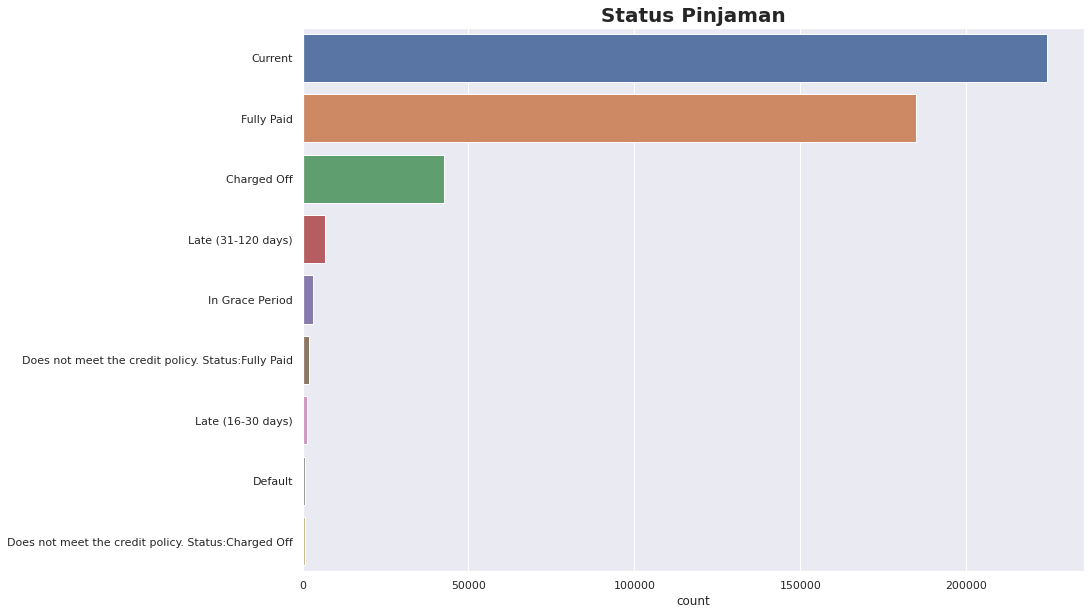

Current                                                48.09%
Fully Paid                                             39.62%
Charged Off                                             9.11%
Late (31-120 days)                                      1.48%
In Grace Period                                         0.67%
Does not meet the credit policy. Status:Fully Paid      0.43%
Late (16-30 days)                                       0.26%
Default                                                 0.18%
Does not meet the credit policy. Status:Charged Off     0.16%
Name: loan_status, dtype: object


In [ ]:
plot_count(df, title="Status Pinjaman",  y="loan_status")

Untuk memudahkan proses permodelan dan untuk menyelaraskan dengan tujuan pembuatan model ini, Kita akan membagi status pinjaman menjadi 2 jenis, yaitu approved dan rejected, dengan ketentuan:

1.   Approved terdiri hanya dari kategori fully paid
2.   Declined terdiri dari charged off, does not meet the credit policy, dan default

Kita tidak menggunakan current, late, dan in grace period dikarenakan asumsi pinjaman-pinjaman tersebut statusnya masih diharapkan untuk dapat dibayar oleh Perusahaan. Batas toleransi dari pinjaman diasumsikan sampai 120 hari.


In [ ]:
approved_cat = ["Fully Paid"]
rejected_cat = [
    "Charged Off",
    "Does not meet the credit policy. Status:Fully Paid",
    "Does not meet the credit policy. Status:Charged Off",
    "Default"
]

In [ ]:
def label_loan_status(value):
    if value in approved_cat:
        return 1
    return 0

label_loan_status("Fully Paid")

1

In [ ]:
target_df = df[df["loan_status"].isin(approved_cat + rejected_cat)].copy()
target_df["loan_status"] = target_df["loan_status"].apply(label_loan_status)

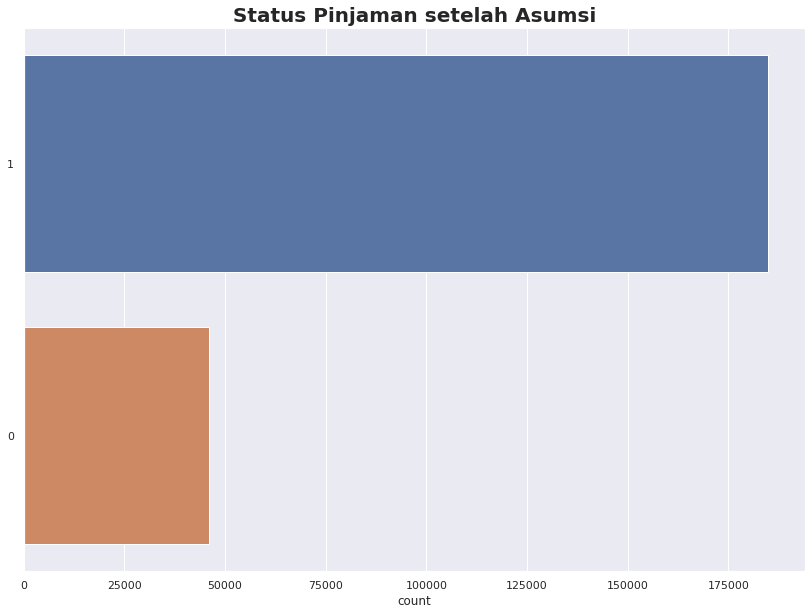

1    80.04%
0    19.96%
Name: loan_status, dtype: object


In [ ]:
plot_count(target_df, y="loan_status", title="Status Pinjaman setelah Asumsi")

### 2. Melihat Missing Values
Missing values adalah data yang nilainya kosong dan dapat berpengaruh pada saat melakukan permodelan. Missing values perlu diberikan perlakuan khusus sesuai dengan nature dari variabel yang ada. Ternyata, dengan visualisasi yang dibuat, ada beberapa variabel yang bahkan hanya terisi misssing values saja.

In [ ]:
data_null_total = pd.DataFrame(target_df.isna().sum()).T.rename({0:'total_null'})

data_null_percentage = pd.DataFrame(100*target_df.isna().sum()/target_df.shape[0]).T.rename({0:'percentage_null'})

data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

,total_null,percentage_null
dti_joint,230795,100
annual_inc_joint,230795,100
total_cu_tl,230795,100
inq_fi,230795,100
all_util,230795,100
max_bal_bc,230795,100
open_rv_24m,230795,100
open_rv_12m,230795,100
il_util,230795,100
total_bal_il,230795,100


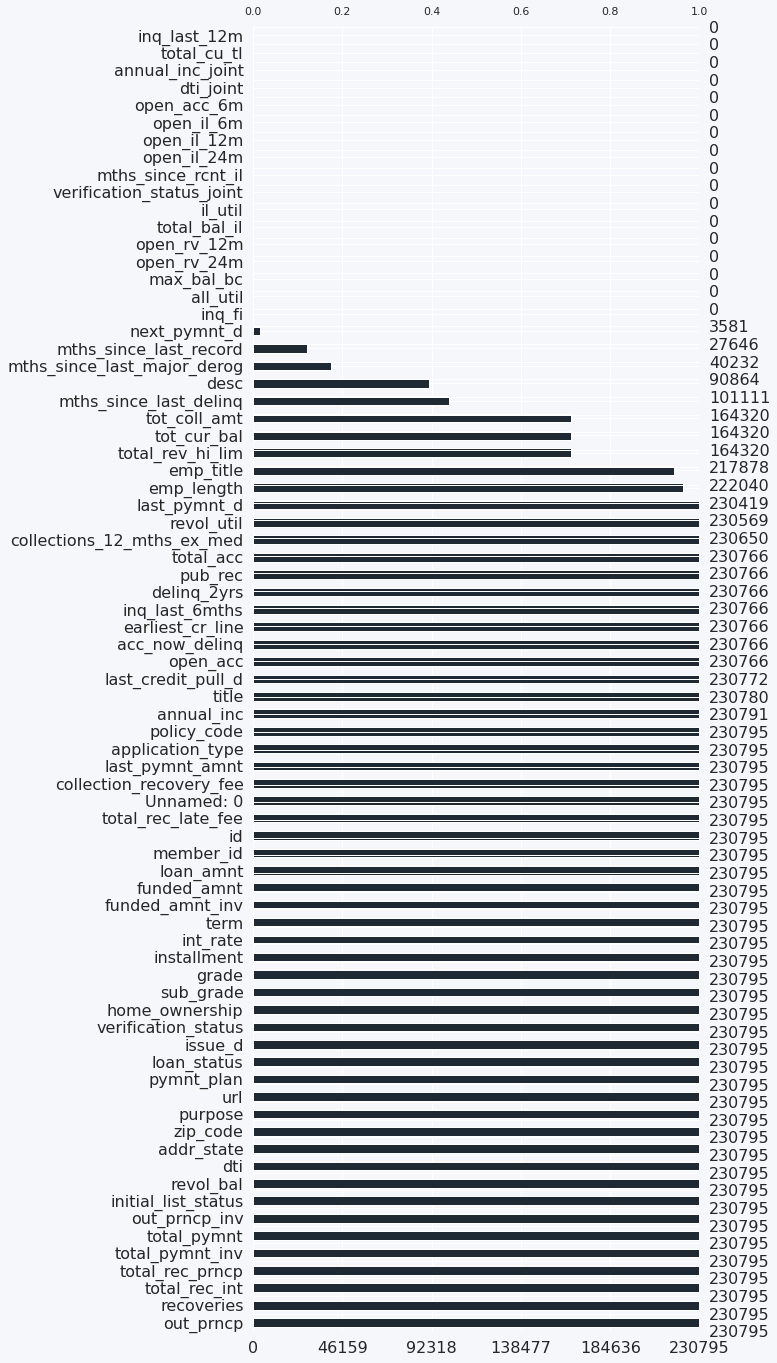

In [ ]:
#menampilkan dengan bar chart

_, ax = plt.subplots(figsize=(8,24), facecolor='#f5f7fa')
ax.set_facecolor('#f5f7fa')

msno.bar(target_df, ax=ax, sort='descending', color='#1F2933')

plt.show()

In [ ]:
# Drop variabel dengan missing values lebih dari 40%

mask = data_null['percentage_null'] > 40
column_null = data_null.loc[mask].index.tolist()

target_df.drop(columns=column_null, inplace=True)
target_df.head()


KeyError: ignored

## 3. Melihat Korelasi antar Variabel
Korelasi didefinisikan sebagai hubungan antara satu variabel dengan variabel lain. Melihat korelasi akan memudahkan Kita untuk menyeleksi variabel yang akan dipakai, mengingat variabel yang terdapat di data sangat banyak, yaitu 73 fitur dan 1 target.

In [ ]:
# Hitung korelasi tiap variabel
correlations = (target_df.select_dtypes(exclude=object)
                         .corr()
                         .dropna(how="all", axis=0)
                         .dropna(how="all", axis=1)
)

In [ ]:
correlations["loan_status"].abs().sort_values(ascending=False)

loan_status                    1.000000
total_rec_prncp                0.460338
recoveries                     0.445422
last_pymnt_amnt                0.384781
total_pymnt_inv                0.358588
total_pymnt                    0.355349
collection_recovery_fee        0.300094
int_rate                       0.241059
total_rec_late_fee             0.152231
inq_last_6mths                 0.116393
dti                            0.107257
out_prncp                      0.099816
out_prncp_inv                  0.099814
revol_util                     0.089180
tot_cur_bal                    0.076230
mths_since_last_record         0.062190
annual_inc                     0.061623
total_rev_hi_lim               0.052931
loan_amnt                      0.049253
funded_amnt                    0.048790
funded_amnt_inv                0.039854
installment                    0.033419
total_rec_int                  0.032997
total_acc                      0.030680
mths_since_last_delinq         0.029299


In [ ]:
# Saring korelasi antara vmin - vmax
vmin, vmax = 0.1, 0.99

unstack_corr = correlations.unstack()
pos_corr = (unstack_corr > vmin) & (unstack_corr < vmax)
neg_corr = (unstack_corr > -vmax) & (unstack_corr < -vmin)
high_corr = unstack_corr[pos_corr | neg_corr]

trimmed_corr = high_corr.sort_values(ascending=False).unstack()

In [ ]:
# Buat mask untuk membentuk matriks segitiga bawah
mask = np.zeros_like(trimmed_corr)
mask[np.triu_indices_from(mask)] = True

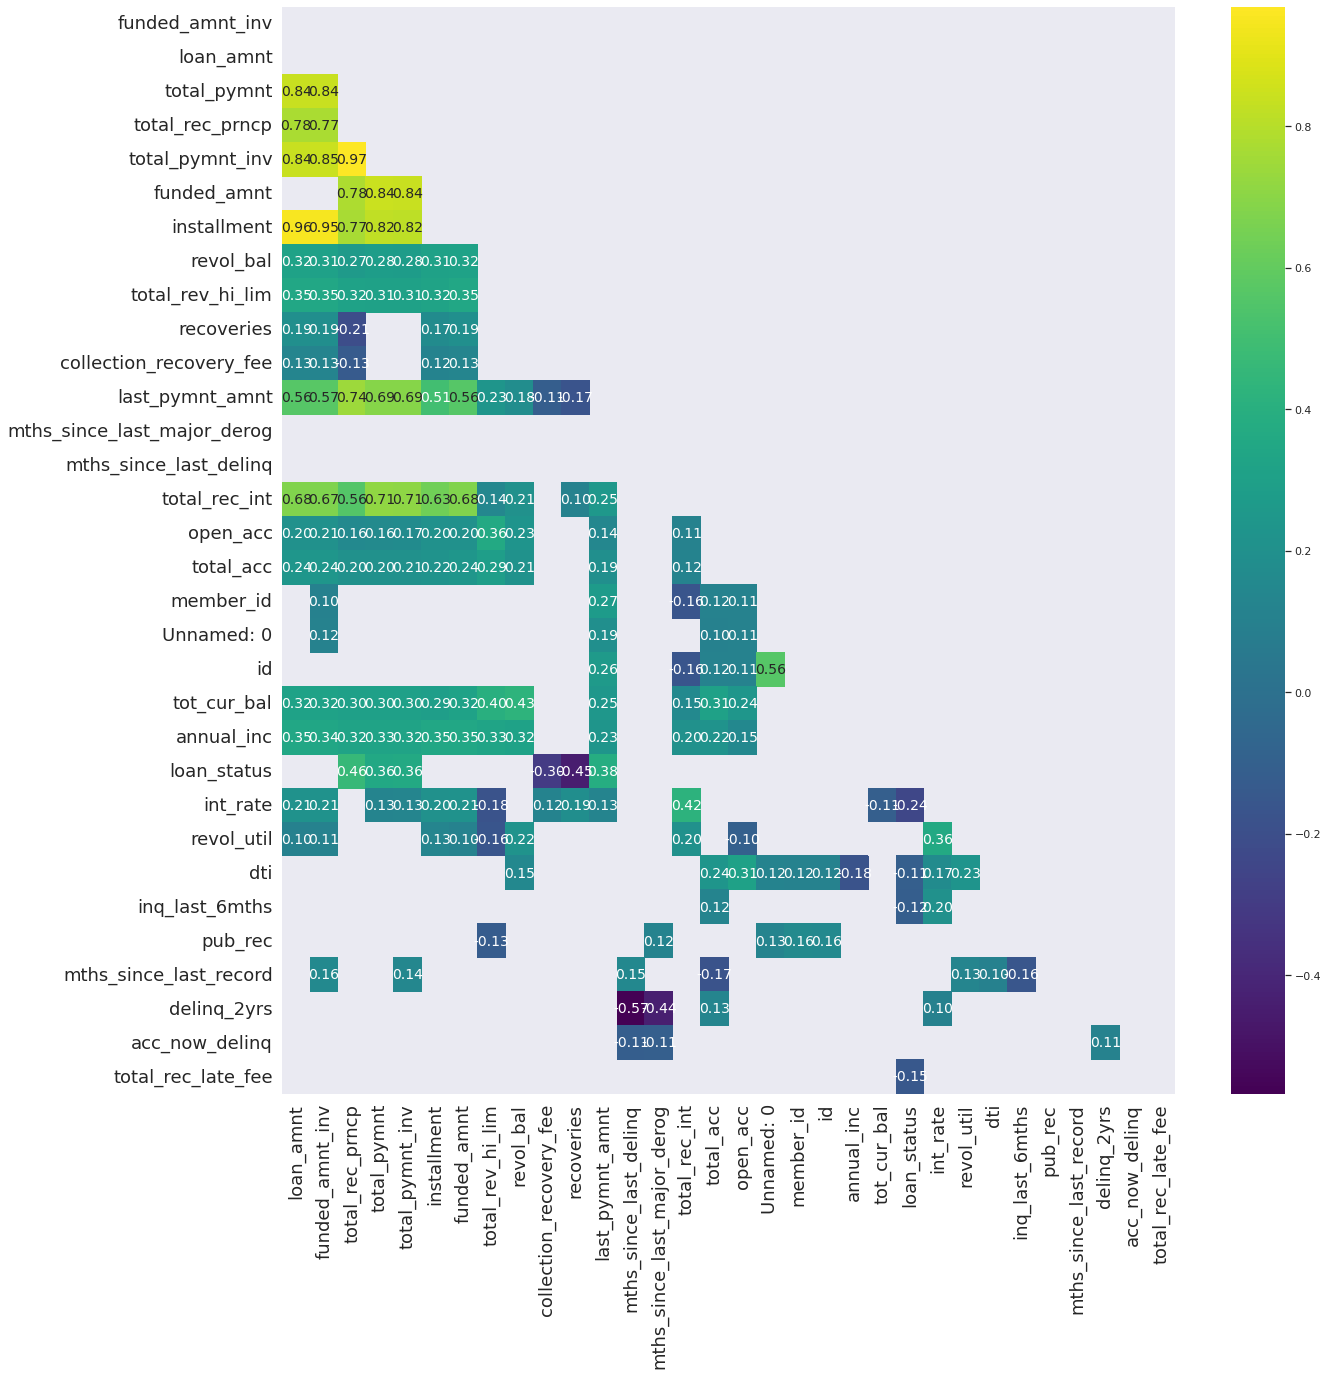

In [ ]:
# Tampilkan heatmap
plt.figure(figsize=(20, 20))
plot = sns.heatmap(
    trimmed_corr, 
    annot=True, 
    mask=mask,
    fmt=".2f", 
    cmap="viridis", 
    annot_kws={"size": 14})

plot.set_xticklabels(plot.get_xticklabels(), size=18)
plot.set_yticklabels(plot.get_yticklabels(), size=18)
plt.show()

In [ ]:
#menampilkan fitur-fitur yang berkorelasi
correlation_loan = high_corr.loc["loan_status"].abs().sort_values(ascending=False)
correlation_loan

total_rec_prncp            0.460338
recoveries                 0.445422
last_pymnt_amnt            0.384781
total_pymnt_inv            0.358588
total_pymnt                0.355349
collection_recovery_fee    0.300094
int_rate                   0.241059
total_rec_late_fee         0.152231
inq_last_6mths             0.116393
dti                        0.107257
dtype: float64

In [ ]:
#menampilkan fitur yang berkorelasi tinggi (asumsi >0.9)

threshold = 0.9
affect_collision = (high_corr.abs()
                             .loc[high_corr > threshold]
                             .loc[correlation_loan.index, correlation_loan.index]
                             .sort_values(ascending=False)
)
affect_collision

total_rec_prncp  total_pymnt        0.975030
total_pymnt      total_rec_prncp    0.975030
total_rec_prncp  total_pymnt_inv    0.969473
total_pymnt_inv  total_rec_prncp    0.969473
dtype: float64

In [ ]:
left_index = affect_collision.index.get_level_values(0)
right_index = affect_collision.index.get_level_values(1)

def remove_collide_index(left_index, right_index):
    include, exclude = [], []

    for left, right in zip(left_index, right_index):
        if left not in include and left not in exclude:
            include.append(left)
        if right not in include and right not in exclude:
            exclude.append(right)
        
    return include, exclude


include_affect_col, exclude_affect_col = remove_collide_index(left_index, right_index)
include_affect_col, exclude_affect_col

(['total_rec_prncp'], ['total_pymnt', 'total_pymnt_inv'])

In [ ]:
affect_num_cols = correlation_loan[~correlation_loan.index.isin(exclude_affect_col)].index.to_list()
affect_num_cols

['total_rec_prncp',
 'recoveries',
 'last_pymnt_amnt',
 'collection_recovery_fee',
 'int_rate',
 'total_rec_late_fee',
 'inq_last_6mths',
 'dti']

### 4. Menvisualisasikan Fitur
**a. Hubungan Loan Status dengan Total Recoveries**

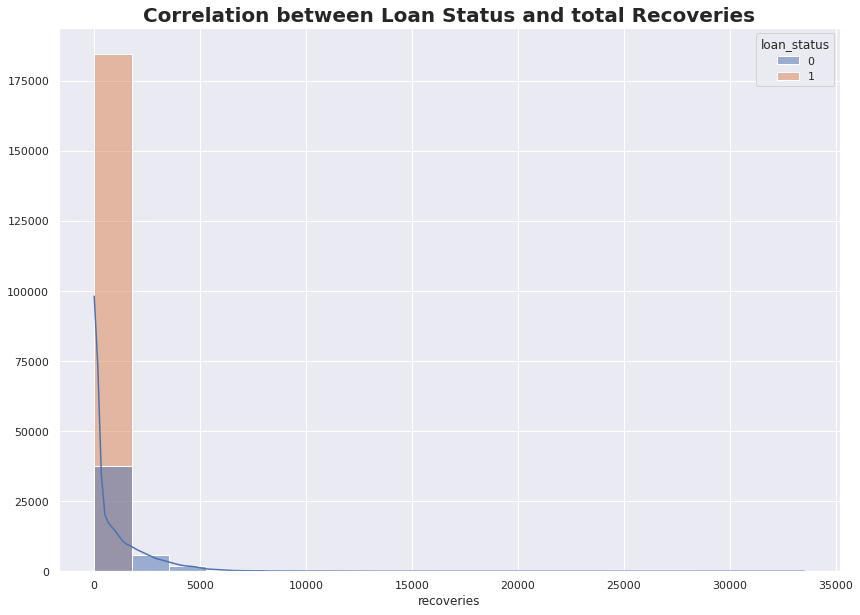

In [ ]:
plot_distribution(df=target_df, x="recoveries", hue="loan_status", title="Correlation between Loan Status and total Recoveries")

**b. Distribusi Loan Amount** 




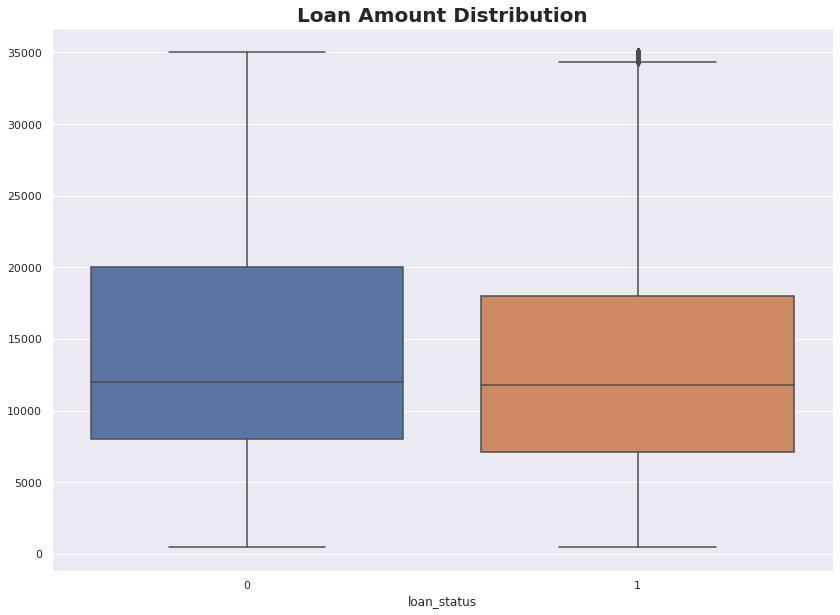

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,46056.0,14205.570393,8362.468087,500.0,8000.0,12000.0,20000.0,35000.0
1,184739.0,13214.394226,7949.030252,500.0,7125.0,11800.0,18000.0,35000.0


In [ ]:
x, y = "loan_status", "loan_amnt"
plot_boxplot(df=target_df, x=x, y=y, title="Loan Amount Distribution")
target_df.groupby(x)[y].describe()

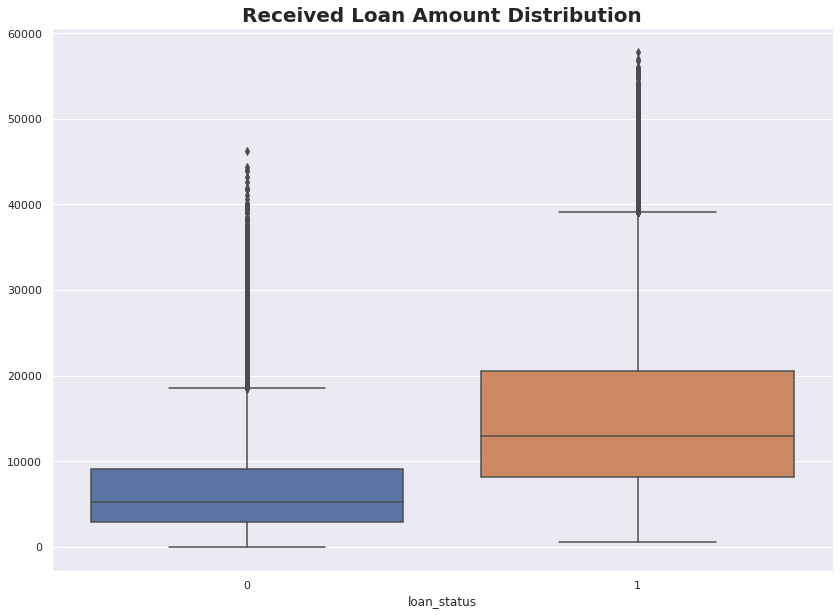

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,46056.0,6814.461231,5610.294962,0.00,2829.912500,5260.94000,9120.685,46199.44000
1,184739.0,15209.872007,9459.142043,526.33,8092.460697,12979.34106,20491.905,57777.57987


In [ ]:
x, y = "loan_status", "total_pymnt"
plot_boxplot(df=target_df, x=x, y=y, title="Received Loan Amount Distribution")
target_df.groupby(x)[y].describe()

**c. Tren Principal Amount yang Sudah Dibayarkan**

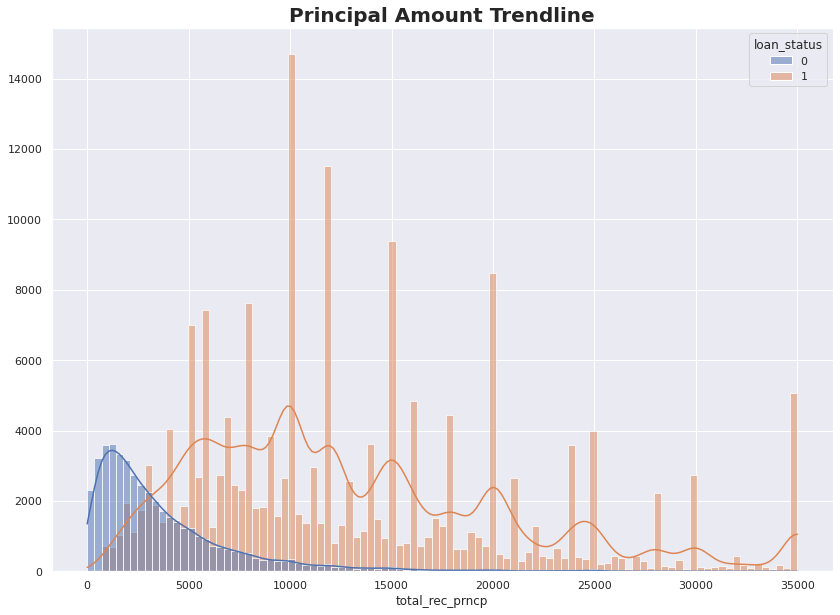

In [ ]:
plot_distribution(df=target_df, x="total_rec_prncp", hue="loan_status", title="Principal Amount Trendline")

**d. Purpose dalam Pinjaman beserta Negara Asal**

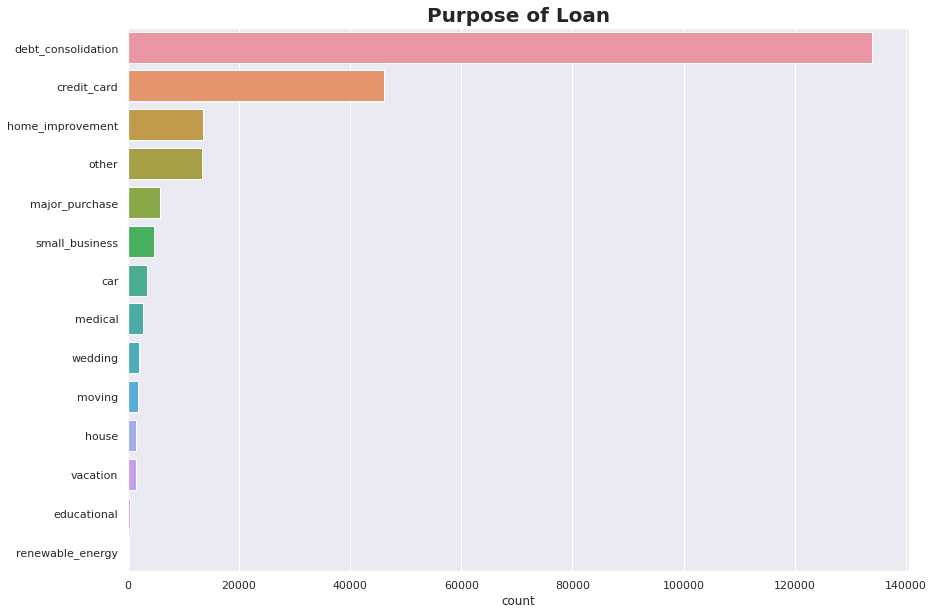

debt_consolidation    58.03%
credit_card           19.95%
home_improvement       5.83%
other                  5.76%
major_purchase         2.54%
small_business         2.02%
car                    1.50%
medical                1.15%
wedding                0.87%
moving                 0.80%
house                  0.65%
vacation               0.62%
educational            0.18%
renewable_energy       0.11%
Name: purpose, dtype: object


In [ ]:
plot_count(target_df, y="purpose", title="Purpose of Loan")

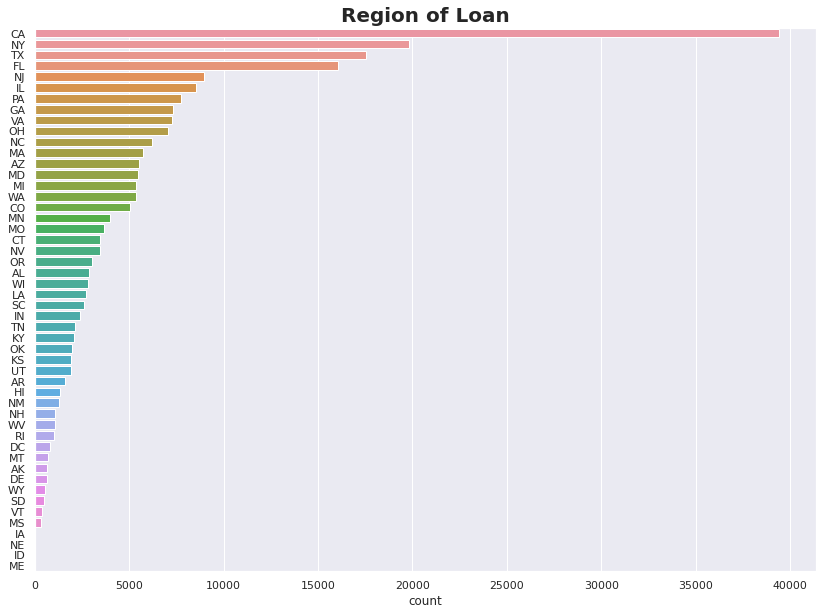

CA    17.08%
NY     8.58%
TX     7.60%
FL     6.96%
NJ     3.87%
IL     3.70%
PA     3.36%
GA     3.17%
VA     3.14%
OH     3.06%
NC     2.69%
MA     2.48%
AZ     2.38%
MD     2.37%
MI     2.33%
WA     2.32%
CO     2.18%
MN     1.73%
MO     1.59%
CT     1.50%
NV     1.49%
OR     1.31%
AL     1.24%
WI     1.21%
LA     1.16%
SC     1.11%
IN     1.04%
TN     0.91%
KY     0.90%
OK     0.84%
KS     0.83%
UT     0.82%
AR     0.70%
HI     0.57%
NM     0.54%
NH     0.46%
WV     0.45%
RI     0.43%
DC     0.34%
MT     0.29%
AK     0.27%
DE     0.26%
WY     0.24%
SD     0.21%
VT     0.17%
MS     0.13%
IA     0.01%
NE     0.01%
ID     0.00%
ME     0.00%
Name: addr_state, dtype: object


In [ ]:
plot_count(df=target_df, y="addr_state", title="Region of Loan")

** e. Tingkat Pinjaman (Loan Grade)**

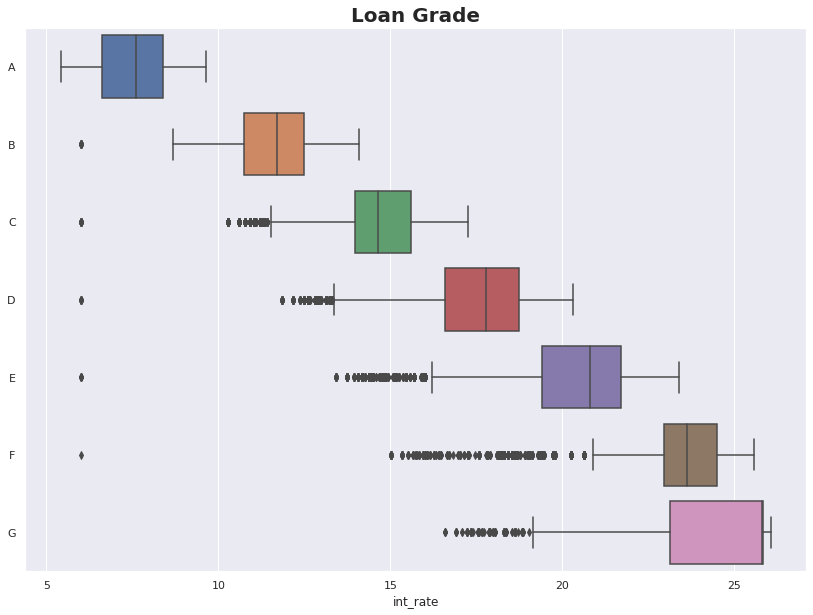

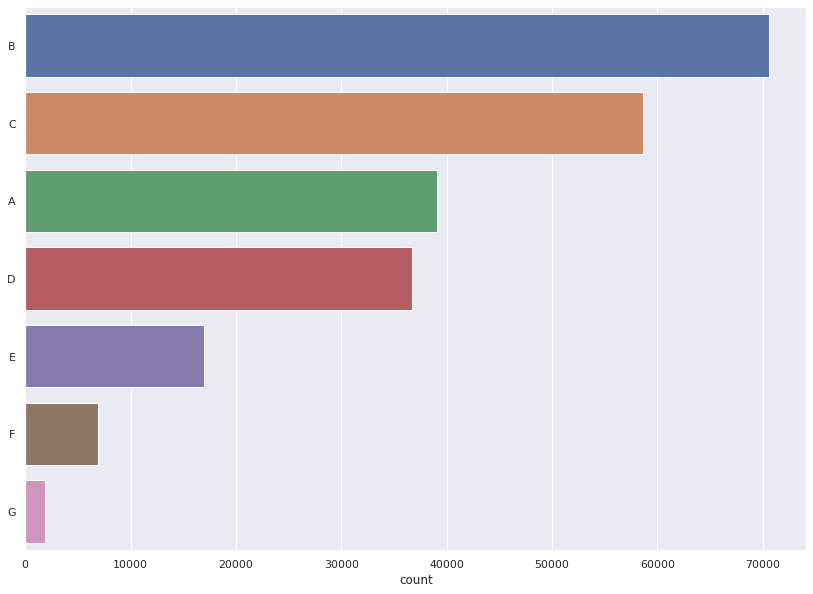

B    30.60%
C    25.40%
A    16.95%
D    15.92%
E     7.34%
F     2.99%
G     0.80%
Name: grade, dtype: object


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,39110.0,7.545742,1.003571,5.42,6.62,7.62,8.39,9.63
B,70622.0,11.654616,1.281087,6.00,10.74,11.71,12.49,14.09
C,58626.0,14.767515,1.233598,6.00,13.98,14.64,15.61,17.27
D,36740.0,17.628885,1.484771,6.00,16.59,17.77,18.75,20.31
E,16945.0,20.341001,1.920465,6.00,19.42,20.80,21.70,23.40
F,6896.0,23.137195,2.097052,6.00,22.95,23.63,24.50,25.57
G,1856.0,24.191482,2.509841,16.59,23.13,25.80,25.83,26.06


In [ ]:
x, y = "int_rate", "grade"
order = target_df[y].sort_values().unique()
plot_boxplot(target_df, x=x, y=y, title="Loan Grade", order=order)
plot_count(df=target_df, y=y, title="")
target_df.groupby(y)[x].describe()

**f. Home Ownership Status**

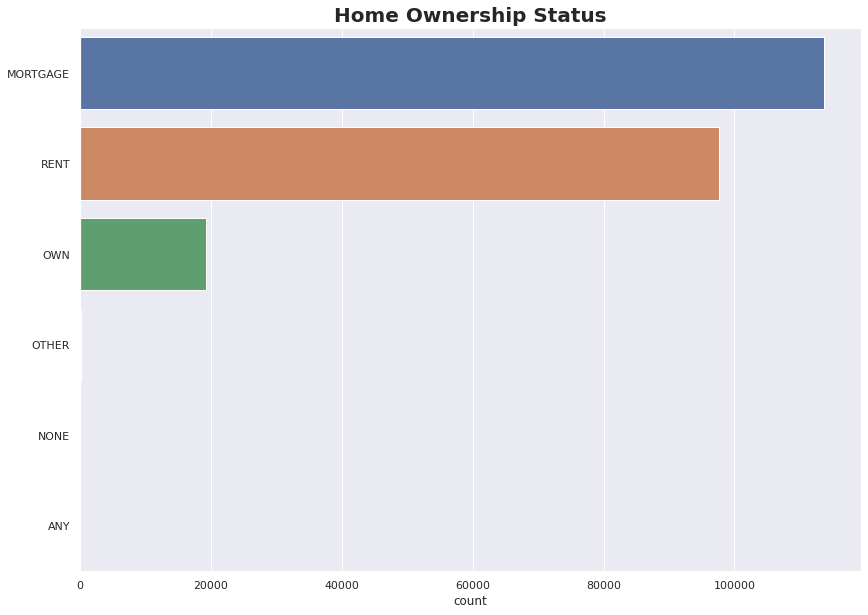

MORTGAGE    49.23%
RENT        42.29%
OWN          8.38%
OTHER        0.08%
NONE         0.02%
ANY          0.00%
Name: home_ownership, dtype: object


In [ ]:
y = "home_ownership"
order = target_df[y].sort_values().unique()
plot_count(df=target_df, y=y, title="Home Ownership Status")

# Preprocessing Data
Selanjutnya, Kita akan memilih dan menyeleksi fitur-fitur yang akan Kita gunakan dalam model. Alasan dibalik pemilihan fitur-fitur ini berdasarkan asumsi agar Model yang dibuat dapat memiliki tingkat akurasi yang tinggi namun juga efisien.

In [ ]:
# Informasi rinci mengenai kolom dan baris data
eda_data = pd.DataFrame()
eda_data.index = target_df.columns
eda_data["unique_value"] = target_df.nunique()
eda_data["missing_rate"] = target_df.isna().mean()
eda_data["dtype"] = target_df.dtypes
eda_data


# Columns with 100% missing values
miss_col = eda_data[eda_data["missing_rate"] == 1].index.to_list()
print(miss_col)
print()

# Colums with so much unique
vari_col = eda_data[eda_data["unique_value"] == eda_data.shape[0]].index.to_list()
print(vari_col)
print()

# Columns with so many categories
cat_col_stat = eda_data[eda_data["dtype"] == "object"]
vari_cat_col = cat_col_stat[cat_col_stat["unique_value"] > 1000].index.to_list()
print(vari_cat_col)
print()

# Columns with just one value
single_valued_col = eda_data[eda_data["unique_value"] == 1].index.to_list()
print(single_valued_col)
print()

removed_features = miss_col + vari_col + vari_cat_col + single_valued_col



['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

[]

['emp_title', 'url', 'desc', 'title']

['policy_code', 'application_type']



In [ ]:
# Drop the features
pre_df = target_df.loc[:, ~target_df.columns.isin(removed_features)].copy()
pre_df.shape

(230795, 52)

## 1. Categorical Feature
Kita akan memproses fitur-fitur yang tergolong kategorikal sebelum dibuatkan model.

In [ ]:
cat_features = pre_df.select_dtypes(include=object).columns
cat_features

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [ ]:
date_cols = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]

for col in date_cols:
    print(pre_df[col].value_counts().iloc[:5])
    print()

Oct-14    8808
Jul-14    8614
Apr-14    6744
Nov-13    6665
Oct-13    6653
Name: issue_d, dtype: int64

Oct-00    1972
Oct-99    1837
Nov-00    1796
Oct-01    1779
Aug-00    1758
Name: earliest_cr_line, dtype: int64

Jul-15    11703
Mar-15    10087
Jun-15    10078
Apr-15    10051
Aug-15     9932
Name: last_pymnt_d, dtype: int64

Jan-16    93758
Dec-15    13753
Nov-15     8199
Sep-15     7942
Oct-15     7805
Name: last_credit_pull_d, dtype: int64



Jika Kita lihat pada fitur tanggal, korelasi antara tanggal dengan status pinjaman sangat kecil, oleh karena itu beberapa fitur tanggal yang nilai korelasi kurang dari 0.2 akan Kita drop.

In [ ]:
drop_cols = ["earliest_cr_line"]
pre_df = pre_df.drop(columns=drop_cols, errors="ignore")
pre_df.head()

TypeError: ignored

In [ ]:
other_cat_cols = cat_features[~cat_features.isin(date_cols)]
other_cat_cols
pre_df.loc[:, other_cat_cols]

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status,next_pymnt_d
0,36 months,B,B2,10+ years,RENT,Verified,n,credit_card,860xx,AZ,f,NaN
1,60 months,C,C4,< 1 year,RENT,Source Verified,n,car,309xx,GA,f,NaN
2,36 months,C,C5,10+ years,RENT,Not Verified,n,small_business,606xx,IL,f,NaN
3,36 months,C,C1,10+ years,RENT,Source Verified,n,other,917xx,CA,f,NaN
5,36 months,A,A4,3 years,RENT,Source Verified,n,wedding,852xx,AZ,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
466276,60 months,D,D3,5 years,MORTGAGE,Verified,n,medical,011xx,MA,f,NaN
466277,36 months,A,A4,3 years,RENT,Verified,n,debt_consolidation,212xx,MD,f,NaN
466278,36 months,D,D3,10+ years,RENT,Source Verified,n,vacation,201xx,VA,f,NaN
466281,60 months,D,D5,10+ years,MORTGAGE,Verified,n,debt_consolidation,377xx,TN,f,NaN


In [ ]:
unused_cols = ["desc", "zip_code", "sub_grade", "title"]
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")
pre_df.head()

used_cols = ["emp_title", "grade", "term"]
unused_cols = other_cat_cols[~other_cat_cols.isin(used_cols)]
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")
pre_df.head()



,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0.00,Jan-15,171.62,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,1.11,Apr-13,119.66,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0.00,Jun-14,649.91,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0.00,Jan-15,357.48,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,0.00,Jan-15,161.03,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


In [ ]:
affect_date_cols = ["issue_d", "last_pymnt_d", "last_credit_pull_d"]
affect_date_cols

['issue_d', 'last_pymnt_d', 'last_credit_pull_d']

In [ ]:
affect_cat_cols = ["grade", "term"]
affect_cat_cols

['grade', 'term']

In [ ]:
predictor_cols = affect_num_cols + affect_cat_cols + affect_date_cols
predictor_cols

['total_rec_prncp',
 'recoveries',
 'last_pymnt_amnt',
 'collection_recovery_fee',
 'int_rate',
 'total_rec_late_fee',
 'inq_last_6mths',
 'dti',
 'grade',
 'term',
 'issue_d',
 'last_pymnt_d',
 'last_credit_pull_d']

In [ ]:
pre_df[predictor_cols].isna().mean().sort_values(ascending=False)

last_pymnt_d               0.001629
inq_last_6mths             0.000126
last_credit_pull_d         0.000100
total_rec_prncp            0.000000
recoveries                 0.000000
last_pymnt_amnt            0.000000
collection_recovery_fee    0.000000
int_rate                   0.000000
total_rec_late_fee         0.000000
dti                        0.000000
grade                      0.000000
term                       0.000000
issue_d                    0.000000
dtype: float64

Dikarenakan masih ada fitur yang memiliki missing values (inq_last_6mths, last_pymnt_d dan next_pymnt_d), maka Kita akan mengisinya dengan menggunakan nilai modus untuk inq_last_6mths dan nilai no untuk last_pymnt_d dan next_pymnt_d (tidak ada tanggal).

In [ ]:
mode = pre_df["inq_last_6mths"].mode().values[0]
pre_df["inq_last_6mths"] = pre_df["inq_last_6mths"].fillna(mode)

pre_df["last_credit_pull_d"] = pre_df["last_credit_pull_d"].fillna("no")
pre_df["last_pymnt_d"] = pre_df["last_pymnt_d"].fillna("no")


In [ ]:
pre_df[predictor_cols].isna().mean().sort_values(ascending=False)

total_rec_prncp            0.0
recoveries                 0.0
last_pymnt_amnt            0.0
collection_recovery_fee    0.0
int_rate                   0.0
total_rec_late_fee         0.0
inq_last_6mths             0.0
dti                        0.0
grade                      0.0
term                       0.0
issue_d                    0.0
last_pymnt_d               0.0
last_credit_pull_d         0.0
dtype: float64

In [ ]:
pre_df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0.000,Jan-15,171.62,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,1.110,Apr-13,119.66,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0.000,Jun-14,649.91,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0.000,Jan-15,357.48,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,0.000,Jan-15,161.03,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,466276,9695736,11547808,8525,8525,8525.0,60 months,18.25,217.65,D,...,11.594,May-14,217.65,Oct-14,0.0,4.0,0.0,0.0,116995.0,49800.0
466277,466277,9007579,10799568,18000,18000,17975.0,36 months,7.90,563.23,A,...,0.000,Nov-14,563.23,Oct-14,0.0,14.0,0.0,0.0,42592.0,50300.0
466278,466278,9745590,11597671,10000,10000,10000.0,36 months,18.25,362.78,D,...,0.000,Sep-15,5501.60,Jan-16,0.0,32.0,0.0,0.0,10170.0,11100.0
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,0.000,Dec-14,17.50,Jan-16,0.0,NaN,0.0,0.0,221830.0,39400.0


In [ ]:
pd.label = pre_df["loan_status"].copy()
pd.features = pre_df[predictor_cols].copy()

print("Label shape:")
print(label.shape)

print("Features shape:")
print(features.shape)

In [ ]:
pd.label

0         1
1         0
2         1
3         1
5         1
         ..
466276    0
466277    0
466278    1
466281    0
466283    1
Name: loan_status, Length: 230795, dtype: int64

In [ ]:
pd.features = pre_df[predictor_cols].copy()

In [ ]:
pd.features

,total_rec_prncp,recoveries,last_pymnt_amnt,collection_recovery_fee,int_rate,total_rec_late_fee,inq_last_6mths,dti,grade,term,issue_d,last_pymnt_d,last_credit_pull_d
0,5000.00,0.00,171.62,0.000,10.65,0.00,1.0,27.65,B,36 months,Dec-11,Jan-15,Jan-16
1,456.46,117.08,119.66,1.110,15.27,0.00,5.0,1.00,C,60 months,Dec-11,Apr-13,Sep-13
2,2400.00,0.00,649.91,0.000,15.96,0.00,2.0,8.72,C,36 months,Dec-11,Jun-14,Jan-16
3,10000.00,0.00,357.48,0.000,13.49,16.97,1.0,20.00,C,36 months,Dec-11,Jan-15,Jan-15
5,5000.00,0.00,161.03,0.000,7.90,0.00,3.0,11.20,A,36 months,Dec-11,Jan-15,Sep-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,360.08,1159.40,217.65,11.594,18.25,0.00,0.0,12.28,D,60 months,Jan-14,May-14,Oct-14
466277,4580.89,0.00,563.23,0.000,7.90,0.00,0.0,10.33,A,36 months,Jan-14,Nov-14,Oct-14
466278,10000.00,0.00,5501.60,0.000,18.25,0.00,0.0,11.57,D,36 months,Jan-14,Sep-15,Jan-16
466281,1837.04,0.00,17.50,0.000,19.97,0.00,5.0,18.45,D,60 months,Jan-14,Dec-14,Jan-16


In [ ]:
pd.features.head()

,total_rec_prncp,recoveries,last_pymnt_amnt,collection_recovery_fee,int_rate,total_rec_late_fee,inq_last_6mths,dti,grade,term,issue_d,last_pymnt_d,last_credit_pull_d
0,5000.00,0.00,171.62,0.00,10.65,0.00,1.0,27.65,B,36 months,Dec-11,Jan-15,Jan-16
1,456.46,117.08,119.66,1.11,15.27,0.00,5.0,1.00,C,60 months,Dec-11,Apr-13,Sep-13
2,2400.00,0.00,649.91,0.00,15.96,0.00,2.0,8.72,C,36 months,Dec-11,Jun-14,Jan-16
3,10000.00,0.00,357.48,0.00,13.49,16.97,1.0,20.00,C,36 months,Dec-11,Jan-15,Jan-15
5,5000.00,0.00,161.03,0.00,7.90,0.00,3.0,11.20,A,36 months,Dec-11,Jan-15,Sep-15


In [ ]:
df=pd.features
df.to_csv('features.csv', encoding = 'utf-8-sig') 
files.download('features.csv')

NameError: ignored

In [ ]:
df=pd.label
df.to_csv('label.csv', encoding = 'utf-8-sig') 
files.download('label.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>